In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\SamanthaBusunt\clean_df_food.csv', encoding='latin-1')
df.head()

,Unnamed: 0,Number,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category,Res strings,Res num
0,0,0,2019-08-01,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails,NaN,630
1,1,1,2019-08-05,Chilli powder,India,Kottackal Agro Foods,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails,Detected,NaN
2,2,2,2019-08-06,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails,Detected,NaN
3,3,3,2019-08-22,Chilli powder,India,Spectrum International,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails,Detected,NaN
4,4,4,2019-08-23,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails,Detected,NaN


In [3]:
df = df.drop('Unnamed: 0', axis=1, errors='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,Number,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category,Res strings,Res num
0,0,2019-08-01,Frozen cooked whole craw fish,China,"Zhejiang Tianhe Aquatic Products Inc., Ltd",Standard plate count,"630 000, 600 000, 4 000 000, 300 000, 28 000 000",cfu/g,CRU 03/2019,Risk microbiological and allergen fails,NaN,630
1,1,2019-08-05,Chilli powder,India,Kottackal Agro Foods,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails,Detected,NaN
2,2,2019-08-06,Diced mozzarella cheese,Italy,Europomella Spa (It 12/009 Ce),Listeria monocytogenes,Detected,/125g,CHE 07/2018,Risk microbiological and allergen fails,Detected,NaN
3,3,2019-08-22,Chilli powder,India,Spectrum International,Salmonella,Detected,/125g,SPI 06/2019,Risk microbiological and allergen fails,Detected,NaN
4,4,2019-08-23,Tahini,Pakistan,Tat Pakistan Sesame Mills,Salmonella,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails,Detected,NaN
5,5,2019-08-30,Halawah with pistachio,Syria,Al Asala Foodstuff Co,Listeria monocytogenes,Detected,/125g,SES 05/2014,Risk microbiological and allergen fails,Detected,NaN
6,6,2019-08-05,Spiced peanuts,India,Raghuvanshi Exports,Aflatoxin,0.214,mg/kg,NUT 11/208,Risk chemical/contaminant/ toxin test results,NaN,0.214
7,7,2019-08-14,Dried herring,Philippines,Kaelen Phils Inc,Histamine,360,mg/kg,HIS 12/2016,Risk chemical/contaminant/ toxin test results,NaN,360
8,8,2019-08-12,Kelp slices,China,Fuzhou Hailin Food Co Ltd,Iodine,3900,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results,NaN,3900
9,9,2019-08-12,Kelp shreds,China,Fuzhou Hailin Food Co Ltd,Iodine,3300,mg/kg,BSW 12/2016,Risk chemical/contaminant/ toxin test results,NaN,3300


In [4]:
def process_dframe(df):
    columns = df.columns.tolist()
    print('List of columns names:', columns, '\n')
    print('The shape look like this', df.shape, '\n')
    print('Here are the information related to the dataframe')
    print(df.info()) 
    print('\n')
    print('Type of the dataframe is the following: ', df.dtypes, '\n')
    
    nulvals = df.isnull().sum()
    print('\nNull Values:', nulvals, '\n')
    print('\n Percentage of missing values for each column:')
    for col in columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
    
    dup = df.duplicated().sum()
    print(f"\nThere are {dup} duplicates.")

process_dframe(df)

List of columns names: ['Number', 'Date of fail', 'Product description', 'Country of origin', 'Producer name', 'Test applied / reason for fail', 'Results', 'Units', 'Reference', 'Food Category', 'Res strings', 'Res num'] 

The shape look like this (1507, 12) 

Here are the information related to the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Number                          1507 non-null   int64 
 1   Date of fail                    1504 non-null   object
 2   Product description             1506 non-null   object
 3   Country of origin               1506 non-null   object
 4   Producer name                   1505 non-null   object
 5   Test applied / reason for fail  1506 non-null   object
 6   Results                         1358 non-null   object
 7   Units                           1044 

In [5]:
import sqlite3
from pandasql import sqldf
conn = sqlite3.Connection(r"C:\Users\SamanthaBusunt\clean_df_food.csv")
pysqldf = lambda q: sqldf(q, globals())

In [6]:
q = """SELECT
    [Test applied / reason for fail], COUNT(*) AS [Count]
FROM
    df
GROUP BY
    [Test applied / reason for fail]
ORDER BY
    [Count] DESC
LIMIT 50
    ;"""

res = sqldf(q, locals())
res

,Test applied / reason for fail,Count
0,Aflatoxin,95
1,Histamine,93
2,Salmonella,68
3,Iodine,52
4,Fruit and vegetable residue screen Chlorpyrifos,44
5,Fruit and vegetable residue screen Carbendazim,40
6,Hydrocyanic acid,35
7,Listeria monocytogenes,27
8,Composition Vitamin C,25
9,Histamine detected in excess of level permitted,21


In [7]:
q = """SELECT
        [Product description], [Country of origin], [Test applied / reason for fail]
     FROM
        df 
        Group by [Country of origin]
    LIMIT 15
    ;"""

res = sqldf(q, locals())
res

,Product description,Country of origin,Test applied / reason for fail
0,None,None,None
1,Peanuts,Argentina,Aflatoxin
2,Frozen magur tray (fish),Bangladesh,Seafood antimicrobial tests Ciprofloxacin Enro...
3,Frozen whole cooked lobster,Brazil,Salmonella
4,Strawberry puree concentrate,Canada,Fruit and vegetable residue screen Carbendazim
5,Frozen mussel meat,Chile,E. coli
6,Frozen cooked whole craw fish,China,Standard plate count
7,Manii moto original (peanuts),Colombia,Composition Additive BHT (antioxidant)
8,Sesame tahini,Egypt,Salmonella
9,Roasted peanuts,Ethiopia,Aflatoxin


In [8]:
q = """SELECT
    [Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%salmonella%'
GROUP BY
    [Country of origin]
ORDER BY
    [Count] DESC
    ;"""

res = sqldf(q, locals())
res

,Test applied / reason for fail,Country of origin,Count,Results
0,Salmonella,India,55,Detected
1,Salmonella,Iran,8,Detected
2,Salmonella,Sri Lanka,5,Detected
3,Salmonella,Vietnam,4,Detected
4,Salmonella,Turkey,4,Detected
5,Salmonella,China,3,Detected
6,Salmonella,Thailand,2,Detected
7,Salmonella,Tanzania,2,Detected
8,Salmonella,Pakistan,2,Detected
9,Salmonella,Mexico,2,Detected


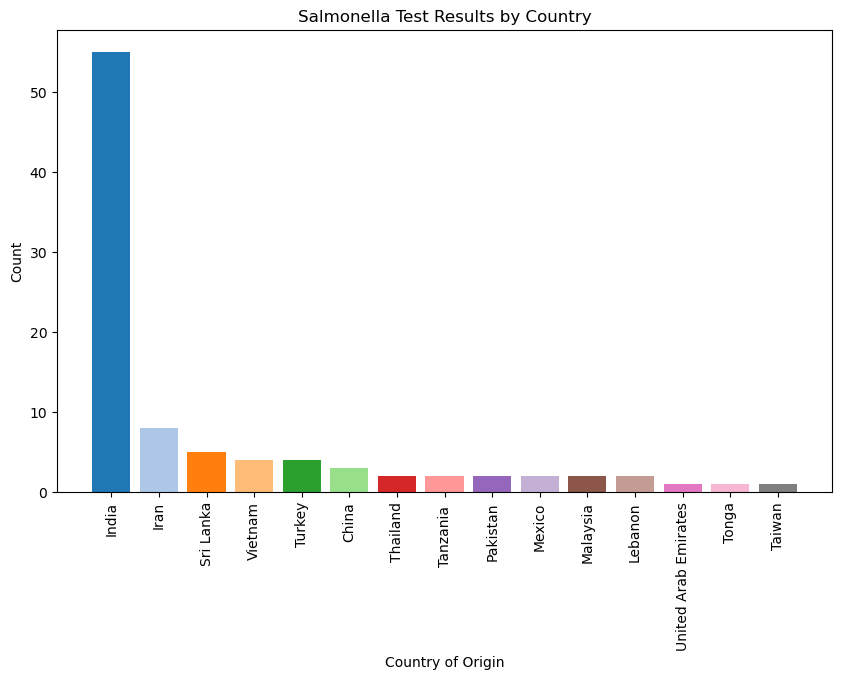

In [9]:
countries = res['Country of origin'][:15] 
counts = res['Count'][:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Salmonella Test Results by Country')
plt.xticks(rotation=90)
plt.show()

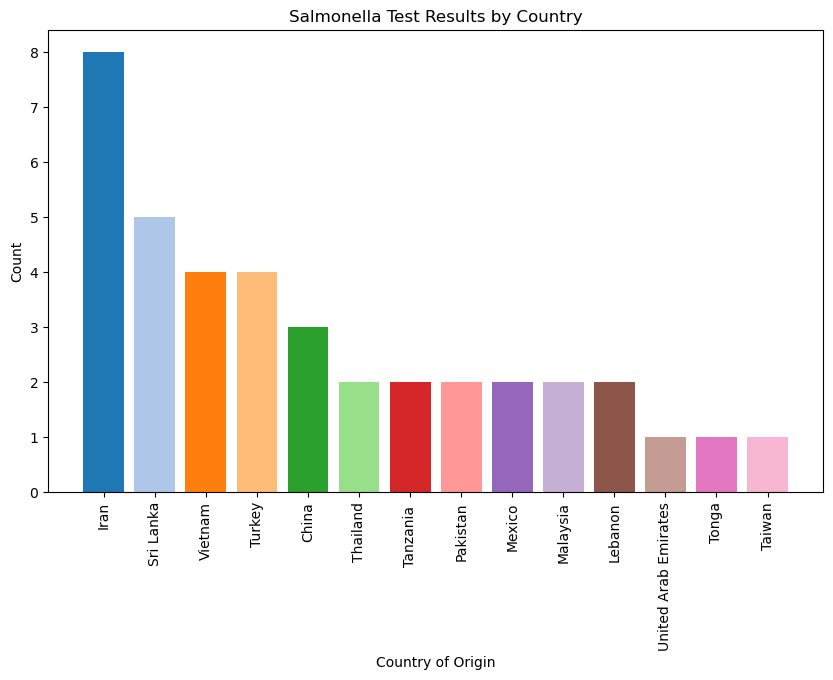

In [10]:
countries = res['Country of origin'][1:15] # removing India to see how the other countries are standing by themsel
counts = res['Count'][1:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Salmonella Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [11]:
df_filled = df.fillna('')
filtered_df = df_filled[df_filled['Test applied / reason for fail'].str.contains('salmonella', case=False)]
result = filtered_df.groupby('Country of origin').size().reset_index(name='Count').sort_values('Count', ascending=False).head(30)
print(result)

       Country of origin  Count
3                  India     55
4                   Iran      8
16             Sri Lanka      5
24               Vietnam      4
22                Turkey      4
1                  China      3
9                 Mexico      2
20              Thailand      2
19             Tanzania       2
12              Pakistan      2
8               Malaysia      2
7                Lebanon      2
10               Myanmar      1
11               Nigeria      1
13          Saudi Arabia      1
14          South Africa      1
15                 Spain      1
17                 Syria      1
18                Taiwan      1
6                 Kuwait      1
5                  Italy      1
21                 Tonga      1
2                  Egypt      1
23  United Arab Emirates      1
0                 Brazil      1


In [12]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%salmonella%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Chilli powder,Salmonella,India,20,Detected
1,Kashmiri chilli powder,Salmonella,India,11,Detected
2,Tahini,Salmonella,Pakistan,4,Detected
3,Red chilli powder,Salmonella,India,4,Detected
4,Crushed chilli,Salmonella,Turkey,4,Detected
5,White pepper powder,Salmonella,Sri Lanka,2,Detected
6,Sesame seed,Salmonella Salmonella detected.,India,2,Detected
7,Extra hot chilli powder,Salmonella,India,2,Detected
8,Chilli,Salmonella,Thailand,2,Detected
9,Black pepper powder,Salmonella,Sri Lanka,2,Detected


In [13]:
df['Test applied / reason for fail'].value_counts().head(30)

Aflatoxin                                                                    95
Histamine                                                                    93
Salmonella                                                                   68
Iodine                                                                       52
Fruit and vegetable residue screen Chlorpyrifos                              44
Fruit and vegetable residue screen Carbendazim                               40
Hydrocyanic acid                                                             35
Listeria monocytogenes                                                       27
Composition Vitamin C                                                        25
Histamine detected in excess of level permitted                              21
Standard plate count                                                         19
Salmonella detected                                                          19
Aflatoxin detected in excess of level pe

In [14]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Aflatoxin%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Peanut candy,Aflatoxin,Malaysia,9,0.048
1,Peanuts,Aflatoxin,Indonesia,7,0.045
2,Roasted peanuts,Aflatoxin,China,6,0.044
3,Peanut butter,Aflatoxin,Ghana,5,0.048
4,Spiced peanuts,Aflatoxin,India,3,0.214
5,Spice coated fried peanuts,Aflatoxin,India,3,0.033
6,Peanut candy bar,Aflatoxin,India,3,0.019
7,Tasty spicy coated peanuts,Aflatoxin,India,2,0.033
8,Spiced peanuts - various flavours,AflatoxinÂ detected in excess of level permitted,India,2,"0.17,"
9,Sesame with peanut paste,Aflatoxin,China,2,0.039


In [15]:
# all are nutts base

In [16]:
q = """SELECT
    [Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results], [Units]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Aflatoxin%'
GROUP BY
    [Country of origin]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Test applied / reason for fail,Country of origin,Count,Results,Units
0,Aflatoxin,India,48,0.214,mg/kg
1,Aflatoxin,China,33,0.044,mg/kg
2,Aflatoxin,Indonesia,14,0.025,mg/kg
3,Aflatoxin,Iran,8,0.087,mg/kg
4,Aflatoxin,Malaysia,7,0.048,mg/kg
5,Aflatoxin,Turkey,5,0.055,mg/kg
6,Aflatoxin,Philippines,5,"0.014product contains 75 per cent peanut, ther...",mg/kg
7,Aflatoxin,Thailand,4,0.113,mg/kg
8,Aflatoxin,Sri Lanka,3,"0.013 (product contains 55% peanut, therefore ...",mg/kg
9,Aflatoxin detected in excess of level permitted,Vietnam,2,0.021 mg/kg,mg/kg


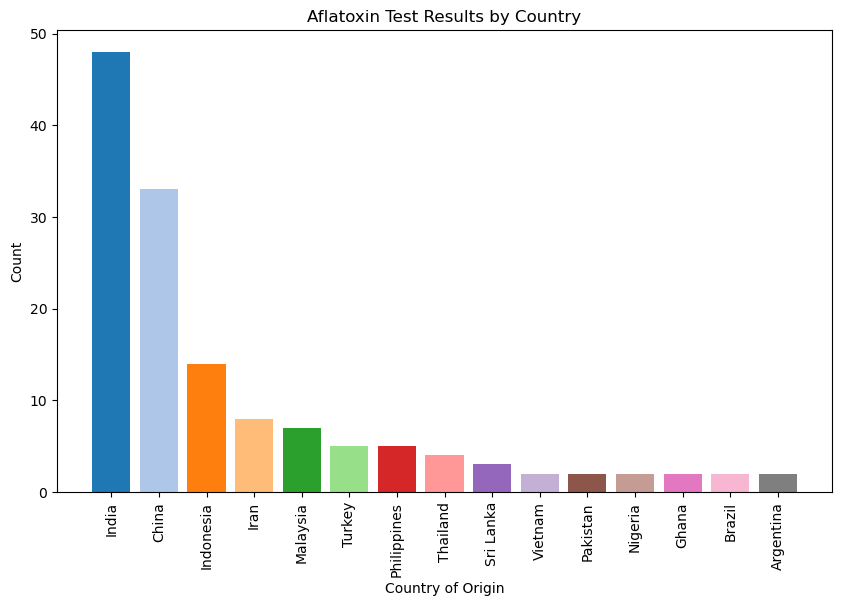

In [17]:
countries = res['Country of origin'][:15] 
counts = res['Count'][:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Aflatoxin Test Results by Country')
plt.xticks(rotation=90)
plt.show()

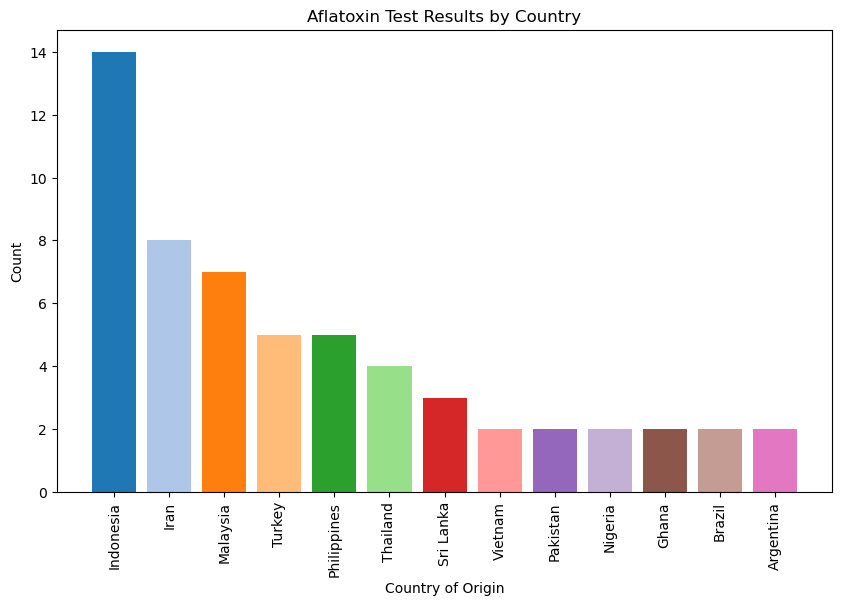

In [18]:
countries = res['Country of origin'][2:15] 
counts = res['Count'][2:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Aflatoxin Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [19]:
q = """SELECT
    [Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results], [Units]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Histamine%'
GROUP BY
    [Country of origin]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Test applied / reason for fail,Country of origin,Count,Results,Units
0,Histamine,Sri Lanka,41,700,mg/kg
1,Histamine,Philippines,19,360,mg/kg
2,Histamine,Maldives,12,710,mg/kg
3,Histamine,Vietnam,10,251,mg/kg
4,Histamine,Myanmar,10,295,mg/kg
5,Histamine,Indonesia,9,1459,mg/kg
6,Histamine,Italy,7,2150,mg/kg
7,Histamine,Japan,6,240,mg/kg
8,Histamine,Thailand,4,455,mg/kg
9,Histamine,India,3,390,mg/kg


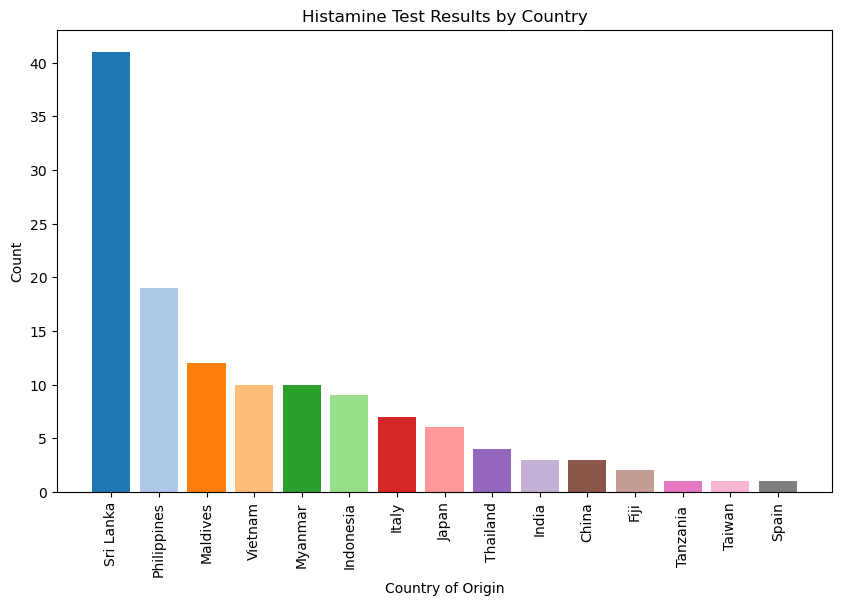

In [20]:
countries = res['Country of origin'][:15] 
counts = res['Count'][:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Histamine Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [21]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Histamine%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Maldive fish chips,Histamine,Sri Lanka,13,210
1,Yellowfin tuna,Histamine,Maldives,5,710
2,Salted anchovies,Histamine,Philippines,5,1500
3,Fresh yellowfin tuna,Histamine,Maldives,5,473
4,Dried herring,Histamine,Philippines,5,360
5,Dried anchovies,Histamine,India,4,390
6,Maldive fish pieces,Histamine,Sri Lanka,3,"220, 240"
7,Dried anchovy,Histamine,Myanmar,3,360
8,Dried anchovies,Histamine,Myanmar,3,410
9,Anchovy fillets,Histamine,Italy,3,330


In [22]:
# all are fish based

In [23]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Iodine%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Dried seaweed,Iodine,Japan,11,4000
1,Dried kelp,Iodine,China,10,2500
2,Seaweed,Iodine,China,6,2600
3,Seasoned seaweed,Iodine,Japan,6,3000
4,Cream crackers,Composition Iodine,Malaysia,6,Not permitted in this food
5,Dried Seaweed,Iodine,Korea,5,4700
6,Kelp powder,Iodine,China,4,6660
7,Organic kelp flakes,Iodine,New Zealand,3,4300
8,"Kelp shreds, slices & knots",Iodine detected in excess of level permitted,China,3,"3300 mg/kg,"
9,Kelp,Iodine detected in excess of level permitted,China,3,6000


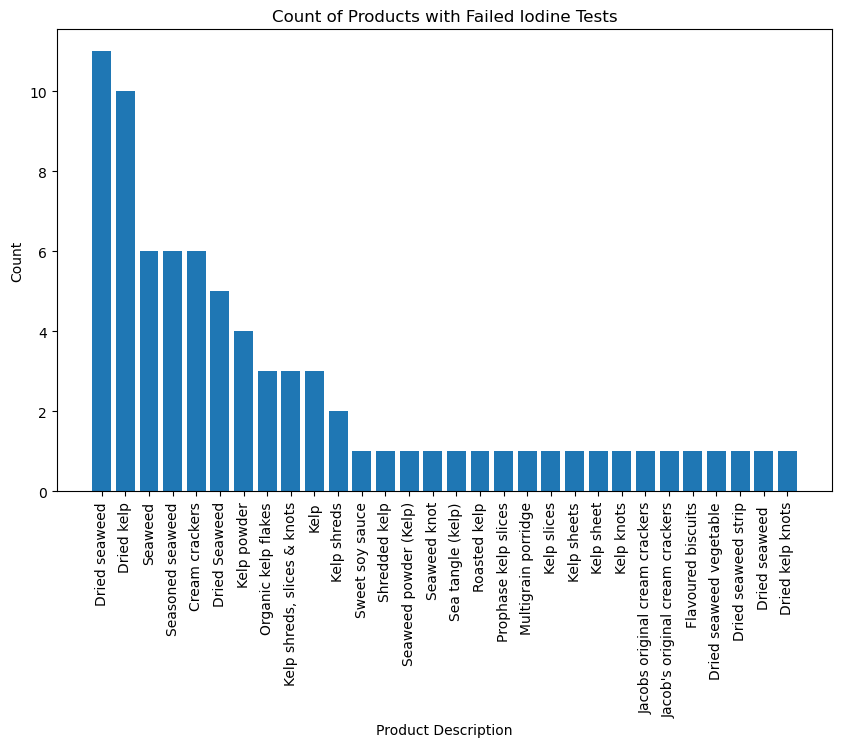

In [24]:
product_description = res['Product description']
count = res['Count']

plt.figure(figsize=(10, 6))
plt.bar(product_description, count)
plt.xticks(rotation=90)
plt.xlabel('Product Description')
plt.ylabel('Count')
plt.title('Count of Products with Failed Iodine Tests')

plt.show()

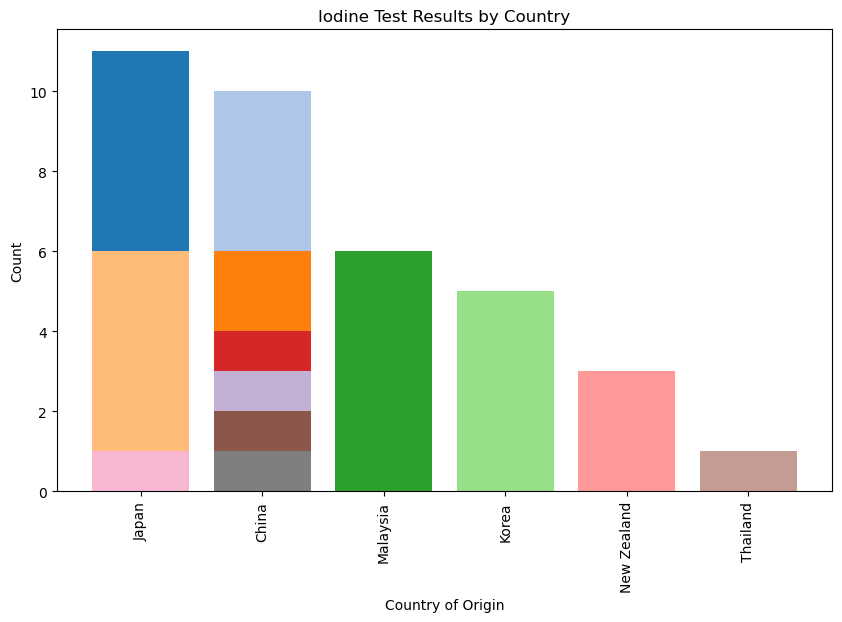

In [25]:
countries = res['Country of origin'][:15]
counts = res['Count'][:15]

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Iodine Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [26]:
#most are seaweeds stuff or grains

In [27]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Chlorpyrifos%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Frozen spinach,Fruit and vegetable residue screen Chlorpyrifos,India,8,0.56
1,Spinach,Fruit and vegetable residue screen Chlorpyrifos,India,7,0.068
2,Toor dal,Fruit and vegetable residue screen Chlorpyrifos,India,3,0.074
3,Frozen chopped spinach,Fruit and vegetable residue screen Chlorpyrifos,India,3,0.03
4,Yellow lentils,Fruit and vegetable residue screen Chlorpyrifo...,India,2,Detected - Not permitted in this food
5,Toor dal (pea),Fruit and vegetable residue screen Chlorpyrifos,Myanmar,2,0.013 - Exceeds permitted MRL
6,Toor daal,Fruit & vegetable residue screen - Chlorpyrifo...,Myanmar,2,0.03 mg/kgÂ Â Â Â
7,Spinach leaves,Fruit and vegetable residue screen Chlorpyrifos,India,2,0.23
8,Okra,Fruit and vegetable residue screen Chlorpyrifo...,Egypt,2,0.02
9,Mung dhal,Fruit and vegetable residue screen Chlorpyrifos,Myanmar,2,0.03


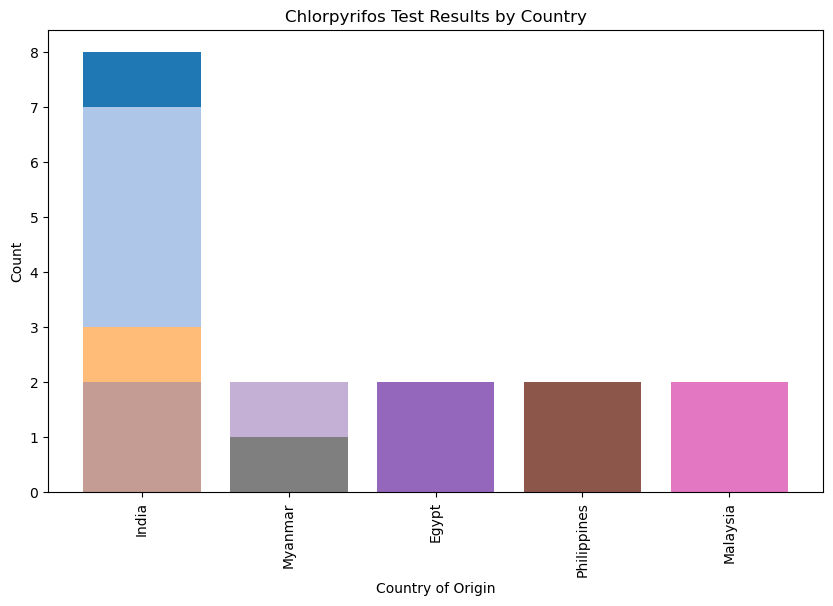

In [28]:
countries = res['Country of origin'][:15]
counts = res['Count'][:15]

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors.tolist())
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Chlorpyrifos Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [29]:
#mostly spinach, lentils and similar stuff, is an insecticide so stuff that grows from the ground?

In [30]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Carbendazim%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Frozen dried longan,Fruit and vegetable residue screen Carbendazim,Thailand,6,0.073
1,Dried longan,Fruit and vegetable residue screen Carbendazim,China,5,0.06
2,Raisins,Fruit and vegetable residue screen Carbendazim,India,4,0.5 - Exceeds permitted MRL
3,Garlic shoots,Fruit and vegetable residue screen Carbendazim,China,3,0.06 - Exceeds permittedMRL
4,Fresh betel leaves,Fruit and vegetable residue screen Carbendazim...,India,3,0.0650.92
5,Raisin sultana,Fruit and vegetable residue screen Carbendazim,India,2,1.19 - Exceeds permitted MRL
6,Green sultanas,Fruit & vegetable residue screenÂ - Carbendazi...,India,2,0.61 mg/kg
7,Frozen whole durian,Fruit and vegetable residue screen Carbendazim,Vietnam,2,0.18 - Exceeds permitted MRL
8,Frozen shredded Chinese spinach,Fruit and vegetable residue screen Carbendazim,China,2,0.28
9,Dried seedless longan,Fruit and vegetable residue screen Carbendazim,Thailand,2,0.06


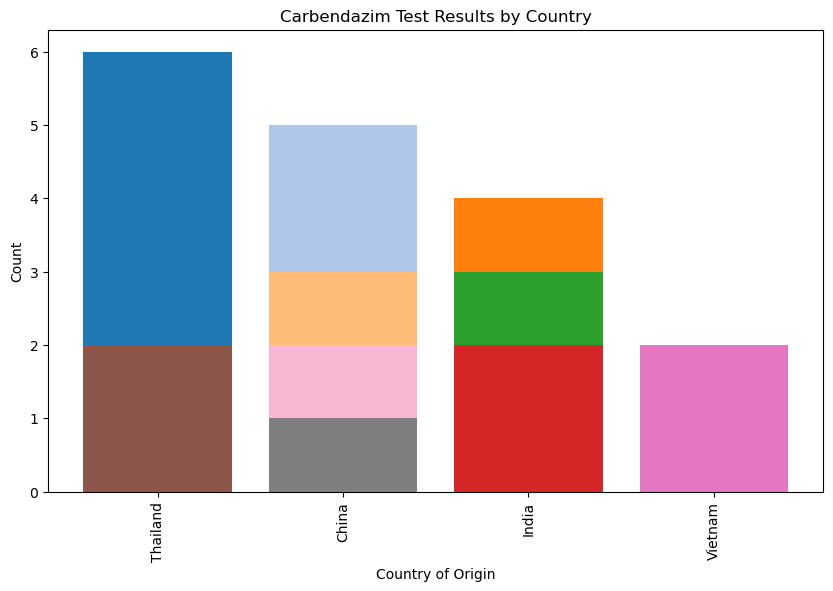

In [31]:
countries = res['Country of origin'][:15]
counts = res['Count'][:15]

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors.tolist())
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Carbendazim Test Results by Country')
plt.xticks(rotation=90)
plt.show()


In [32]:
# Carbendazim is fungicide, low toxicity but still risky. seems like it's mostly ground stuff as well


In [33]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Hydrocyanic acid%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Tapioca chips,Hydrocyanic acid,India,19,11
1,Cassava chips,Hydrocyanic acid,Indonesia,9,11
2,Tapioca chips spicy,Hydrocyanic acid,India,3,42
3,Tapioca sticks,Hydrocyanic acid,Indonesia,1,18
4,Tapioca stick masala chips,Hydrocyanic acid,India,1,14
5,Tapioca crisp,Hydrocyanic acid,Malaysia,1,11
6,Tapioca chips sticks,Hydrocyanic acid,India,1,43
7,Tapioca chips masala flavour,Hydrocyanic acid,India,1,24
8,Tapioca chips masala,Hydrocyanic acid,India,1,22
9,Tapioca chips hot,Hydrocyanic acid,India,1,20


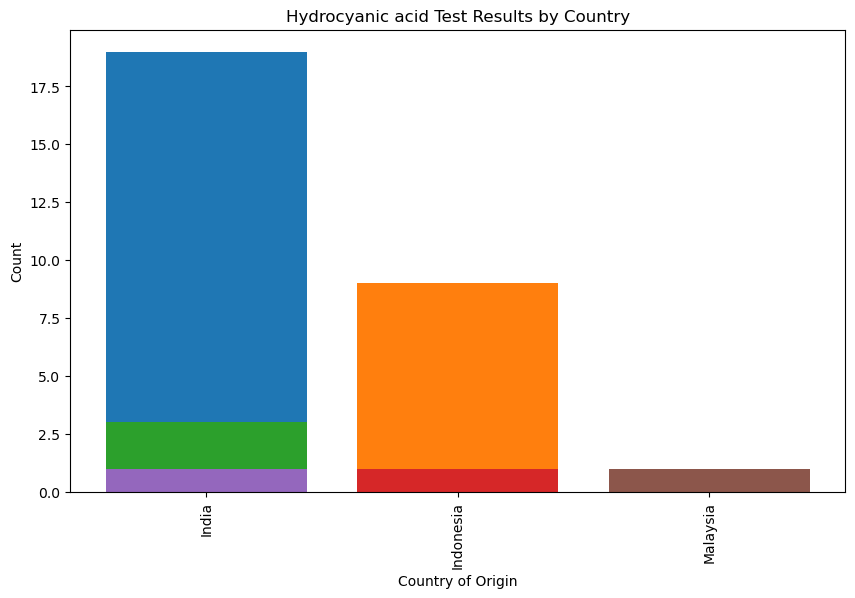

In [34]:
import matplotlib.colors as mcolors

countries = res['Country of origin'][:15]
counts = res['Count'][:15]

color_palette = mcolors.TABLEAU_COLORS
colors = list(color_palette)[:len(countries)]

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors, bottom=0)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Hydrocyanic acid Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [35]:
# only tapioca and cassava. both are root vegetable
#Exposure to hydrogen cyanide (AC) can be rapidly fatal

In [36]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%Listeria%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Smoked salmon,Listeria monocytogenes,Poland,2,Detected
1,Compostelle cheese,Listeria monocytogenes,France,2,Detected
2,Vannamei prawn cooked peeled and deveined,Listeria monocytogenes detected,Vietnam,1,Detected /125g
3,Vannamei prawn cooked,Listeria monocytogenes detected,Vietnam,1,Detected /125g
4,Unseasoned whole crayfish,Listeria monocytogenes,China,1,Detected
5,Toma san sebastiano cheese,Listeria monocytogenes detected,Italy,1,Detected /125g
6,Taleggio DOP cheese,Listeria monocytogenes,Italy,1,Detected
7,Sliced herring fillets in oil,Listeria monocytogenes detected,Latvia,1,Detected /125g
8,Shrimps in sauce,Listeria monocytogenes detected,China,1,Detected /125g
9,Sheep cheese with chili,Listeria monocytogenes detected,Spain,1,Detected


In [37]:
#Listeria bacteria can be found in soil, water and animal feces. People can get infected by eating the following: Raw vegetables that have been contaminated from the soil or from contaminated manure used as fertilizer. Contaminated meat.
#odlly not the big ones that are dominating, lots of EU countries


In [38]:
q = """SELECT
    [Product description],[Test applied / reason for fail],[Country of origin], COUNT(*) AS [Count], [Results]
FROM
    df
WHERE
    [Test applied / reason for fail] LIKE '%coli%'
GROUP BY
    [Product description]
ORDER BY
    [Count] DESC
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Product description,Test applied / reason for fail,Country of origin,Count,Results
0,Frozen mussel meat,E. coli,Chile,3,"17, 2, 5, <2, <2"
1,Fresh baby corn,Microbiological E. coli,Thailand,3,"<10, <10, 23, 43, 240"
2,Oysters,E. coli,Taiwan,2,"9.3, 4.3, 110, 4.3, 15"
3,Mussels,E. coli,Fiji,2,"110, >110, >110, >110, 46"
4,Baby corn,Escherichia coli detected in excess of levels ...,Thailand,2,"<10, 240, <10, 93, <10 MPN/g"
5,White clam (whole),E. coli,Vietnam,1,"9.3, <2.3, <2.3, <2.3, <2.3"
6,Spinach,E. coli Detected in excess of permitted level,India,1,"4, 23, 9, <10, 150"
7,Seasoned baby clam meat,E. coli detected in excess of level permitted,Korea,1,"<2.3, <2.3, <2.3, 2.3, 24"
8,Oyster,Escherichia coli detected in excess of levels ...,China,1,">110, >110, >110, >110, >110 MPN/gÂ"
9,Frozen whole white clams,E. coli,Vietnam,1,"46, 24, 110, <2.3, <2.3"


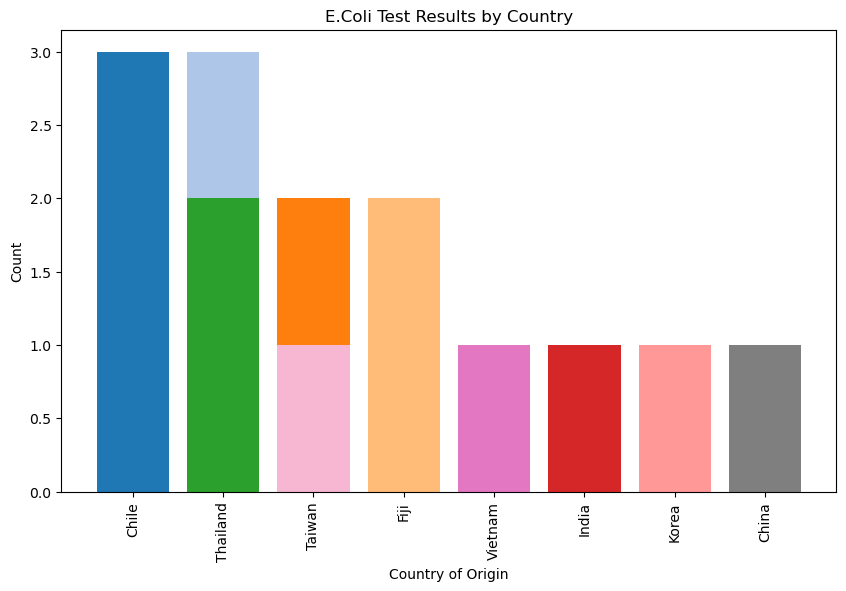

In [40]:
countries = res['Country of origin'][:15] 
counts = res['Count'][:15] 

num_countries = len(countries)
color_map = plt.get_cmap('tab20')
colors = color_map(np.arange(num_countries))

plt.figure(figsize=(10, 6))
plt.bar(countries, counts, color=colors)
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('E.Coli Test Results by Country')
plt.xticks(rotation=90)
plt.show()

In [42]:
q = """SELECT
*
FROM
    df
WHERE
    [Country of origin]  LIKE '%Canada%'
LIMIT 30
    ;"""

res = sqldf(q, locals())
res

,Number,Date of fail,Product description,Country of origin,Producer name,Test applied / reason for fail,Results,Units,Reference,Food Category,Res strings,Res num
0,267,2020-04-30,Strawberry puree concentrate,Canada,Pacific Coast Fruit Products Ltd,Fruit and vegetable residue screen Carbendazim,0.29,mg/kg,FSC 1.4.2,Surveillance food tests,None,0.29
1,371,2020-12-14,Raspberry juice concentrate,Canada,Pacific Coast Fruit Products Ltd,Fruit and vegetable residue screen Fipronil,0.10 Exceeds permitted MRL,mg/kg,FSC 1.4.2,Surveillance food tests,Exceeds permitted MRL,0.10
2,540,2020-03-30,Frozen mixed fruit,Canada,Nature's Touch Frozen Foods Inc,Fruit and vegetable residue screen Tau-fluvali...,0.11Not permitted in this food,mg/kg,FSC 1.4.2,Surveillance food tests,11Not permitted in this food,0.11
3,613,2020-09-28,Burn HD thermogenic cortisol support supplement,Canada,HD Muscle,Composition Caffeine,9.56 - Exceeds permitted ML,g/100g,FSC 1.1.1,Surveillance food tests,Exceeds permitted ML,9.56
4,1212,2022-09-29,Birthday cake flavoured cereal,Canada,Post Foods Canada Inc,Composition - Additive; Erythrosine (E127) not...,None,None,FSC 1.3.1,Surveillance,None,None
5,1458,2022-09-30,Frozen blueberries,Canada,Alex Ingredients Inc,Fruit & vegetable residue screenÂ - Spirotetra...,7.1 mg/kg,mg/kg,FSC 1.4.2,Surveillance,None,7.1


In [43]:
q = """SELECT
    COUNT([Number]) AS CountOfNumber
FROM
    df
WHERE
    [Date of fail] LIKE '%2020%';"""

res = sqldf(q, locals())
res

,CountOfNumber
0,511
